In this notebook, we are going to discuss about decision making using the PD model we built. We will compute the PD score for individual accounts. Based on the feature or variables an each individual has, the model computes the odds of being good vs being bad , in another words how good the borrower is. For instance:

Feature coeefficient

| Variable | Coefficient |
|----------|----------|
| Age [25 - 40]  | 0.235 |
| Age [25 - 40] | 0.143 |
| Education [BS ] | -0.52 |
| Education [MS ] | 0.6 |
| Purpose [Car ] | 0.70 |

PD score is linear computation of all variables, then we get log odds.

\begin{equation}
    ln\left ( \frac{\left( 1 - PD \right )}{\left( PD\right)} \right ) = 3.5 => i.e, e^{3.54} => 1-PD = \frac{e^{3.54}}{e^{3.54} + 1}
\end{equation}

Hence, 1-PD (good borrowers) = 0.92, which is eaxctly the model produced.

In the following section of this notebook, we will compute the credit score for each of the individuals.

In [1]:
import numpy as np
import pandas as pd
from joblib import load
from logistic_regression_wrapper import LogisticRegressionWrapper

In [2]:
data_path = f"./data/"
model_path = f"./models/"

In [3]:
# train_data = pd.read_csv(f"{data_path}processed_train.csv")
test_data = pd.read_csv(f"{data_path}processed_test.csv")

In [4]:
woe_vars = pd.read_csv(f"{data_path}/woe_cat_vars.csv").squeeze()
ref_vars = pd.read_csv(f"{data_path}/woe_ref_vars.csv").squeeze()

print(f"# of woe cat vars: {len(woe_vars)}, # of woe ref vars: {len(ref_vars)}")

# of woe cat vars: 118, # of woe ref vars: 22


Loading the model

In [5]:
pd_model = load(f"{model_path}m_zero.joblib")

In [6]:
required_features = list(ref_vars.values) +  pd_model.feature_names
x_test, y_test = test_data.loc[:, required_features], test_data["good_bad"]
print(f"with refs: [xtest: {x_test.shape}, y_test: {y_test.shape}")

with refs: [xtest: (93257, 96), y_test: (93257,)


##### Compute credit score 

In [7]:
summary = pd.DataFrame(columns=["feature"], data=pd_model.feature_names)
summary["coefficients"] = np.transpose(pd_model.coef_)
summary['p_value'] = pd_model.p_values
summary.index = summary.index + 1
summary.loc[0] = ["intercept", pd_model.intercept_[0], np.nan]
summary = summary.sort_index()
summary

,feature,coefficients,p_value
0,intercept,-0.731294,NaN
1,grade:A,1.016916,5.283330e-29
2,grade:B,0.854733,1.268703e-45
3,grade:C,0.676734,7.133004e-34
4,grade:D,0.521357,5.251552e-23
...,...,...,...
70,dti:12.97_16.79,0.048041,2.259660e-03
71,dti:20.75_23.99,-0.078927,3.511072e-06
72,dti:24.9_31.99,-0.135511,5.352269e-17
73,mths_since_last_record:>2,0.074476,1.129349e-05


In [8]:
# Lets addd ref category variable as well
ref_cat_df = pd.DataFrame(ref_vars.values, columns=["feature"])
# we will merge with summary table
ref_cat_df["coefficients"] = 0
ref_cat_df["p_value"] = np.nan
ref_cat_df

,feature,coefficients,p_value
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:NE_IA_NV_AL_ID_ND_FL_HI,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ_small_biz_wedd_renno_enerby_movin...,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,months_since_issued_date:>172,0,NaN
9,int_rate:>20.281,0,NaN


In [9]:
score_card_df = pd.concat([summary, ref_cat_df])
score_card_df = score_card_df.reset_index()
score_card_df

,index,feature,coefficients,p_value
0,0,intercept,-0.731294,NaN
1,1,grade:A,1.016916,5.283330e-29
2,2,grade:B,0.854733,1.268703e-45
3,3,grade:C,0.676734,7.133004e-34
4,4,grade:D,0.521357,5.251552e-23
...,...,...,...,...
92,17,total_acc:<=28,0.000000,NaN
93,18,acc_now_delinq:0,0.000000,NaN
94,19,dti:>32,0.000000,NaN
95,20,mths_since_last_record:0_2,0.000000,NaN


In [10]:
score_card_df["original_featre_name"] = score_card_df['feature'].str.split(':').str[0]
score_card_df

,index,feature,coefficients,p_value,original_featre_name
0,0,intercept,-0.731294,NaN,intercept
1,1,grade:A,1.016916,5.283330e-29,grade
2,2,grade:B,0.854733,1.268703e-45,grade
3,3,grade:C,0.676734,7.133004e-34,grade
4,4,grade:D,0.521357,5.251552e-23,grade
...,...,...,...,...,...
92,17,total_acc:<=28,0.000000,NaN,total_acc
93,18,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
94,19,dti:>32,0.000000,NaN,dti
95,20,mths_since_last_record:0_2,0.000000,NaN,mths_since_last_record


Now, we will convet PD model in to simple score. The range will be (min-max) (300, 850) - Just like FICO.
The minimum credit assessment is defined when a borrower falls into the 'worst' categories for all variables. Similarly, The maximum credit assessment is reached when a borrower falls into the 'best' categories of all variables.

In [11]:
min_score, max_score = 300, 850

In [12]:
original_coef = score_card_df.groupby("original_featre_name")['coefficients']
original_coef.describe()

,count,mean,std,min,25%,50%,75%,max
original_featre_name,,,,,,,,
acc_now_delinq,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
addr_state,13.0,0.177448,0.144407,0.000000,0.074990,0.138128,0.215559,0.518929
annual_inc,10.0,0.373832,0.211923,0.000000,0.219356,0.417620,0.531365,0.636967
delinq_2yrs,2.0,0.025249,0.035708,0.000000,0.012625,0.025249,0.037874,0.050498
dti,6.0,0.026651,0.123744,-0.135511,-0.059195,0.024021,0.120472,0.181689
emp_length,6.0,0.139040,0.074437,0.000000,0.137750,0.145555,0.187927,0.205931
grade,7.0,0.514795,0.363873,0.000000,0.266912,0.521357,0.765733,1.016916
home_ownership,3.0,0.070425,0.062279,0.000000,0.046516,0.093031,0.105637,0.118243
initial_list_status,2.0,0.034650,0.049002,0.000000,0.017325,0.034650,0.051975,0.069300


In [13]:
min_sum_coef= original_coef.min().sum()
max_sum_coef = original_coef.max().sum()
print(f"min sum coeff: {min_sum_coef}, max sum coeff: {max_sum_coef}")

min sum coeff: -1.690752930331029, max sum coeff: 6.260874700119958


Now, How do we scale dummy variable coefficient to credit score !!


\begin{equation}
    variable\_score = variable\_coeff \times  \frac{\left( max\_score - min\_score \right )}{\left( max\_sumof\_coef - min\_sumof\_coef \right)}
\end{equation}


In [14]:
score_card_df['score_compute'] = score_card_df["coefficients"] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
score_card_df

,index,feature,coefficients,p_value,original_featre_name,score_compute
0,0,intercept,-0.731294,NaN,intercept,-50.582288
1,1,grade:A,1.016916,5.283330e-29,grade,70.338312
2,2,grade:B,0.854733,1.268703e-45,grade,59.120366
3,3,grade:C,0.676734,7.133004e-34,grade,46.808481
4,4,grade:D,0.521357,5.251552e-23,grade,36.061350
...,...,...,...,...,...,...
92,17,total_acc:<=28,0.000000,NaN,total_acc,0.000000
93,18,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
94,19,dti:>32,0.000000,NaN,dti,0.000000
95,20,mths_since_last_record:0_2,0.000000,NaN,mths_since_last_record,0.000000


For the intecept:
\begin{equation}
    intercept\_score =  \frac{\left( intercept\_coeff - min\_sum\_coeff \right )}{\left( max\_sumof\_coef - min\_sumof\_coef \right)} \times \left ( max\_score - min\_score  \right) + min\_score
\end{equation}

In [15]:
score_card_df['score_compute'][0] = ((score_card_df["coefficients"][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
score_card_df

/tmp/ipykernel_71157/266522332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card_df['score_compute'][0] = ((score_card_df["coefficients"][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,feature,coefficients,p_value,original_featre_name,score_compute
0,0,intercept,-0.731294,NaN,intercept,366.364097
1,1,grade:A,1.016916,5.283330e-29,grade,70.338312
2,2,grade:B,0.854733,1.268703e-45,grade,59.120366
3,3,grade:C,0.676734,7.133004e-34,grade,46.808481
4,4,grade:D,0.521357,5.251552e-23,grade,36.061350
...,...,...,...,...,...,...
92,17,total_acc:<=28,0.000000,NaN,total_acc,0.000000
93,18,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
94,19,dti:>32,0.000000,NaN,dti,0.000000
95,20,mths_since_last_record:0_2,0.000000,NaN,mths_since_last_record,0.000000


In [16]:
score_card_df['score_compute_rounded'] = score_card_df['score_compute'].round()
score_card_df.head()

,index,feature,coefficients,p_value,original_featre_name,score_compute,score_compute_rounded
0,0,intercept,-0.731294,NaN,intercept,366.364097,366.0
1,1,grade:A,1.016916,5.283330e-29,grade,70.338312,70.0
2,2,grade:B,0.854733,1.268703e-45,grade,59.120366,59.0
3,3,grade:C,0.676734,7.133004e-34,grade,46.808481,47.0
4,4,grade:D,0.521357,5.251552e-23,grade,36.061350,36.0


In [17]:
score_card_df["score"] = score_card_df["score_compute_rounded"]
score_card_df["score"][56] = 4 # it was rounded to 3 when actual was 3.49
score_card_df["score"][24] = 16 # it was rounded to 15.47 when actual was 16

/tmp/ipykernel_71157/2983067528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card_df["score"][56] = 4 # it was rounded to 3 when actual was 3.49
/tmp/ipykernel_71157/2983067528.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_card_df["score"][24] = 16 # it was rounded to 15.47 when actual was 16


In [18]:
# lets check the boundaries for minimum and maximu score.
min_score_from_model = score_card_df.groupby("original_featre_name")["score_compute_rounded"].min().sum()
max_score_from_model = score_card_df.groupby("original_featre_name")["score_compute_rounded"].max().sum()

print(f"Socre + intercept, min: {min_score_from_model} max:{max_score_from_model}")

Socre + intercept, min: 300.0 max:848.0


The max score is 848 it is due to rounding the scores.

In [19]:
min_score_from_model = score_card_df.groupby("original_featre_name")["score"].min().sum()
max_score_from_model = score_card_df.groupby("original_featre_name")["score"].max().sum()
print(f"Socre + intercept, min: {min_score_from_model} max:{max_score_from_model}")

Socre + intercept, min: 300.0 max:850.0


In [20]:
score_card_df.head()


,index,feature,coefficients,p_value,original_featre_name,score_compute,score_compute_rounded,score
0,0,intercept,-0.731294,NaN,intercept,366.364097,366.0,366.0
1,1,grade:A,1.016916,5.283330e-29,grade,70.338312,70.0,70.0
2,2,grade:B,0.854733,1.268703e-45,grade,59.120366,59.0,59.0
3,3,grade:C,0.676734,7.133004e-34,grade,46.808481,47.0,47.0
4,4,grade:D,0.521357,5.251552e-23,grade,36.061350,36.0,36.0


In [21]:
x_test.head()

,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:NE_IA_NV_AL_ID_ND_FL_HI,verification_status:Verified,purpose:educ_small_biz_wedd_renno_enerby_moving_other_house,initial_list_status:f,term:60,emp_length:0,months_since_issued_date:>172,int_rate:>20.281,...,open_acc:>=31,pub_rec:3_4,total_acc:28_50,dti:1.6_6.39,dti:6.39_10.39,dti:12.97_16.79,dti:20.75_23.99,dti:24.9_31.99,mths_since_last_record:>2,total_rev_hi_lim:>95K
0,False,0,0,True,0,False,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,False,1,0,False,0,False,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,False,1,1,False,0,True,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,False,1,0,True,0,False,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,False,0,0,False,0,False,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Nowm we will compute the credit score. But first we have to insert intercept to column index 0 in order to compute the following. 

\begin{equation}
    credit\_score = intercept + \beta_{grade:A} \times grade:A + \beta_{grade:B} \times grade:B+  + ................. \beta_{M:N} \times M:N
\end{equation}

By inserting into df we will have dot product between individual instance and score we have.

In [22]:
x_test_copy = x_test
x_test_copy.insert(0, 'intercept', 1) #inserts intercept columns into col: 0 in given df
x_test_copy = x_test_copy[score_card_df["feature"].values]
x_test_copy.head()

,intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NY,...,months_since_earliest_cr_line:<171,delinq_2yrs:>7,inq_last_6mths:>6,open_acc:<4,pub_rec:0_2,total_acc:<=28,acc_now_delinq:0,dti:>32,mths_since_last_record:0_2,total_rev_hi_lim:<=5K
0,1,False,False,True,False,False,False,True,False,True,...,0,0,0,0,1,1,1,0,1,0
1,1,True,False,False,False,False,False,False,False,False,...,0,0,0,0,1,0,1,0,1,0
2,1,False,True,False,False,False,False,False,False,False,...,0,0,0,1,1,1,1,0,1,0
3,1,False,False,True,False,False,False,False,False,False,...,0,0,0,0,1,1,1,0,1,0
4,1,False,False,True,False,False,False,False,True,False,...,0,0,0,0,1,1,1,0,0,0


In [23]:
scores = score_card_df["score"]
scores = scores.values.reshape(scores.shape[0], 1)
print(f"input data: {x_test_copy.shape}, score data: {scores.shape}")

input data: (93257, 97), score data: (97, 1)


In [24]:
y_scores = x_test_copy.dot(scores)
y_scores.head()

,0
0,604.0
1,643.0
2,588.0
3,563.0
4,597.0


y_score is the credit score based on our PD model. The PD model and a credit scores serve the same purpose. Lets reverse the credit score to PD. This can be achieve using hte following forumla.

*From credit score to PD*

\begin{equation}
    sum\_of\_coef\_from\_score =  \frac{\left( total\_score - min\_score \right )} {\left ( max\_score - min\_score  \right)} {\left( max\_sumof\_coef - min\_sumof\_coef \right)} + min\_sumof\_coef
\end{equation}

lets turn that sum of coefficient from score into PD.

\begin{equation}
    \frac{\exp^{sum\_of\_coef\_from\_score}}{1 + \exp^{sum\_of\_coef\_from\_score}}
\end{equation}

this is equivalent to sigmoid function:

\begin{equation}
    \frac{1}{1 + \exp^{-sum\_of\_coef\_from\_score}}
\end{equation}


In [25]:
sum_of_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
sum_of_coef_from_score = sum_of_coef_from_score.astype(float) # just to make sure, otherwise it np.exp throws error

In [26]:
y_hat_probab_from_score = np.exp(sum_of_coef_from_score) / (np.exp(sum_of_coef_from_score) + 1) 
y_hat_probab_from_score.head()

,0
0,0.937282
1,0.963321
2,0.922228
3,0.892023
4,0.931062


The PD score we have above is exactly same as predicted by our PD model.

##### Deciding cut-off score

This score will decide whether to approve a loan or not. Lets take a look at the following table.

| PD | Credit Score | Proportion (G vs B)|
|----------|----------|------------------|
| 1%  | 800 | 3G |
| 3%  | 700 | 3G 2B |
| 4%  | 650 | 4G 3B |
| 6%  | 628 | 4G 4B |
| 7%  | 609 | 3G 4B|
| 8%  | 600 | 2G 3B |
| 10% | 580 | 3B |


If we set up a cutoff score, all borrowers with lower PD than the cutoff will be granted a loan and higher PD will be rejected. The cut-off score has following implications:

- Predetermines the total number of borrowers that will be approved and rejected. 
- Impacts the quality of loans

Hence, it is a trade-off.  Fewer loands = High quality borrowers and vice versa. We can take a look at False neagtive and False positives. In both case bank bears the loss. Lets examine the AUROC curve.

In [59]:
test_input = x_test.copy()
test_input = test_input.loc[:, pd_model.feature_names]
test_input.shape

(93257, 74)

In [60]:
y_hat_probab = pd_model.model.predict_proba(test_input)
y_hat = y_hat_probab[:, 1]
y_hat[:5]

array([0.93836425, 0.96345361, 0.92353087, 0.89195483, 0.93084926])

In [61]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import seaborn as sns

              precision    recall  f1-score   support

           0       0.17      0.72      0.27     10234
           1       0.94      0.56      0.71     83023

    accuracy                           0.58     93257
   macro avg       0.56      0.64      0.49     93257
weighted avg       0.86      0.58      0.66     93257



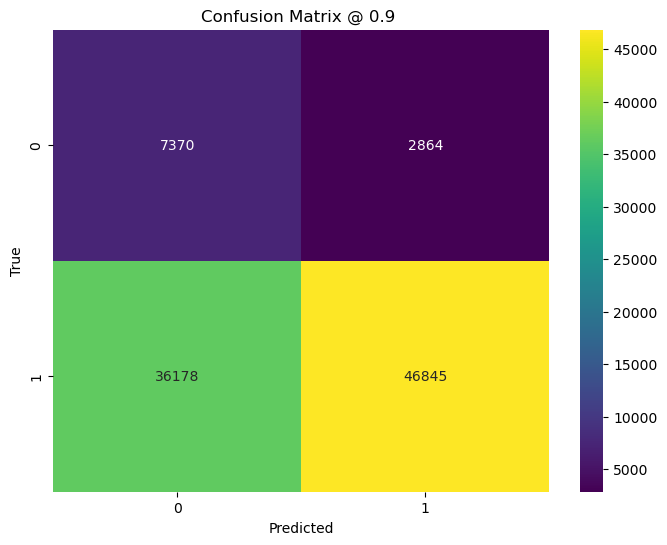

In [62]:
threshold = 0.9
y_hat_test = np.where((y_hat > threshold), 1,0)


print(classification_report(y_test, y_hat_test))

cm = confusion_matrix(y_test, y_hat_test)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title(f"Confusion Matrix @ {threshold} ")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

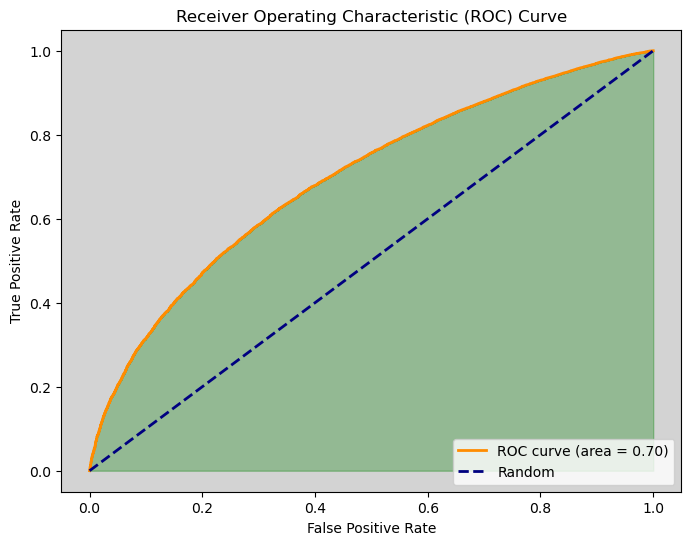

In [63]:

fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(figsize=(8, 6))

# Set background color and alpha (transparency)
ax.set_facecolor('lightgray')  # You can change 'lightgray' to any color you want
ax.set_alpha(0.3)  # Adjust alpha for transparency


ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
ax.fill_between(fpr, 0, tpr, color='green', alpha=0.3)
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.show()

In [64]:
cutoffs = pd.concat([pd.DataFrame(thresholds, columns=["thresholds"]), pd.DataFrame(fpr, columns=["fpr"]), pd.DataFrame(tpr, columns=["tpr"])], axis=1)
cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.992812,0.000000,0.000012
2,0.990899,0.000000,0.000132
3,0.990863,0.000098,0.000132
4,0.990436,0.000098,0.000217


In [65]:
cutoffs["thresholds"][0] = 1 -1 / np.power(10, 16) ### setting some valeus 

We could use either credit score or PD to set cutoff values. 

we compute the score for each thresholds. good: threshold value, and bad: 1 - good.

\begin{equation}
    score\_from\_probabilities =  \left ( \ln \frac{ prob\_good } {1 - prob\_good} - min\_sumof\_coef  \right ) \times \frac{max\_score - min\_score}{\left( max\_sumof\_coef - min\_sumof\_coef \right)} + min\_core
\end{equation}

In [66]:
cutoffs["score"] = ((np.log(cutoffs['thresholds'] / (1 - cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
cutoffs["score"][0] = 850
cutoffs.head()

,thresholds,fpr,tpr,score
0,1.000000,0.000000,0.000000,850.0
1,0.992812,0.000000,0.000012,758.0
2,0.990899,0.000000,0.000132,741.0
3,0.990863,0.000098,0.000132,741.0
4,0.990436,0.000098,0.000217,738.0


Lets examine the possible approval and rejection rate for each threshold (cutoff).

\begin{equation}
\begin{aligned}

    total = number\_of\_approved + number\_of\_rejected \\
    Approval\_rate = \frac{ number of approved }{total} \\
    rejection\_rate = \frac{number of rejected }{total}  or 1 - Approval\_rate
\end{aligned}
\end{equation}

In [67]:
def count_approved(t):
    return np.where(y_hat > t, 1, 0).sum()

In [68]:
cutoffs['n_approved'] = cutoffs['thresholds'].apply(count_approved)
cutoffs['n_rejected'] = y_hat.shape[0] - cutoffs['n_approved']
cutoffs['approval_rate'] = cutoffs['n_approved'] / y_hat.shape[0]
cutoffs['rejection_rate'] = 1 - cutoffs['approval_rate']

cutoffs.head()

,thresholds,fpr,tpr,score,n_approved,n_rejected,approval_rate,rejection_rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992812,0.000000,0.000012,758.0,0,93257,0.000000,1.000000
2,0.990899,0.000000,0.000132,741.0,10,93247,0.000107,0.999893
3,0.990863,0.000098,0.000132,741.0,11,93246,0.000118,0.999882
4,0.990436,0.000098,0.000217,738.0,18,93239,0.000193,0.999807


In [78]:
# Define a custom style function
def highlight_row(row, highlight_row_index):
    return ['background-color: brown' if row.name == highlight_row_index else '' for _ in row]

In [86]:
styled_df = cutoffs.loc[5475: 5485,].style.apply(lambda row: highlight_row(row, 5477), axis=1)
styled_df

,thresholds,fpr,tpr,score,n_approved,n_rejected,approval_rate,rejection_rate
5475,0.900038,0.279363,0.563940,569.000000,49678,43579,0.532700,0.467300
5476,0.900036,0.279461,0.563940,569.000000,49679,43578,0.532711,0.467289
5477,0.900028,0.279461,0.564000,569.000000,49684,43573,0.532764,0.467236
5478,0.900026,0.279656,0.564000,569.000000,49686,43571,0.532786,0.467214
5479,0.900019,0.279656,0.564097,569.000000,49694,43563,0.532872,0.467128
5480,0.900018,0.279754,0.564097,569.000000,49695,43562,0.532882,0.467118
5481,0.900009,0.279754,0.564205,569.000000,49704,43553,0.532979,0.467021
5482,0.900008,0.279851,0.564205,569.000000,49705,43552,0.532989,0.467011
5483,0.899970,0.279851,0.564350,569.000000,49717,43540,0.533118,0.466882
5484,0.899969,0.279949,0.564350,569.000000,49718,43539,0.533129,0.466871


Lets take an example of highlighted row, If we set 0.9000028 as a threshold value, we will have 0.533 approval rate and 0.467 rejection rate with 569 credit score.

In [87]:
score_card_df.to_csv(f"{data_path}score_card.csv")

#### Model monitoring 

Population stability Index: The Population Stability Index (PSI) is a metric used in data science and analytics to assess the stability of a population or distribution over time. It is particularly useful in the context of model deployment and monitoring. PSI helps to identify shifts or changes in the characteristics of the data distribution between a reference population (usually a training or historical dataset) and a new population (such as a validation or production dataset).

- Expected data: Data from original population.
- Actual data: The data from new population.


\begin{equation}
    PSI =  \sum_{i=1}^j \left [ \left( \%actual_i - \%expected_i \right) \times \left ( \frac{\%actual}{\%expected} \right) \right]
\end{equation}

| PSI | Interpretation |
|----------|----------|
| PSI = 0| No difference  |
| PSI < 0.1| Little or no difference  |
| 0.1 < PSI < 0.25| Little difference |
| PSI > 0.25| Big difference - needs action |
| PSI = 1| Absolute difference |